# ST445 Managing and Visualizing Data

## Week 8 Assignment
---

#### Your Candidate Number: 

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import make_biclusters
from sklearn.cluster._bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score
from sklearn.datasets import make_blobs

### Q1. Matrix data visualization (5 points)

In this exercise you need to visualize co-usage of pairs of programming languages in GitHub repositories. You have two datasets for this analysis (a) ```repos-per-lang.csv``` that contains information about how many GitHub repositories use specific programming language and (b) ```lang-pairs-per-repo-top-1000.csv``` that contains information about how many times two programming languages are used in a common repository. In particular, you need to:

Plot a heatmap visualizing the cosine similarity of pairs of programming languages with respect to their co-usage in GitHub repositories with the rows and the columns ordered according to: (a) random permutation and (b) a monotonic order of the Fiedler vector elements. To calculate the similarity matrix, refer to Page 6 of the lecture note. Notice that in this example, for each programming language, the feature vector is binary. As mentioned in class, each entry indicates whether it is being used in a particular GitHub repo or not.

In [41]:
repo_lang = pd.read_csv("ReposPerLang.csv")
pairs_repo = pd.read_csv("LangPairsPerRepoTop1000.csv")

repo_lang = repo_lang.dropna()
pairs_repo = pairs_repo.dropna()
display(repo_lang)
display(pairs_repo)

shape = repo_lang.shape[0]
matrix = np.zeros((shape, shape), dtype = int)
matrix.shape

df = pd.DataFrame(matrix, columns=repo_lang['lang'], index=repo_lang['lang'])

for i in range(shape):
    df[pairs_repo['lgn'][i]][pairs_repo['t2_lgn'][i]]= pairs_repo['cnt'][i]
    df[pairs_repo['t2_lgn'][i]][pairs_repo['lgn'][i]]= pairs_repo['cnt'][i]
    df[repo_lang['lang'][i]][repo_lang['lang'][i]]= repo_lang['cnt'][i]

df

,cnt,lang
0,1160725,JavaScript
1,871264,CSS
2,814370,HTML
3,671755,Shell
4,567150,Python
...,...,...
332,7,Opal
333,4,Omgrofl
334,4,Befunge
335,4,RUNOFF


,lgn,t2_lgn,cnt
0,JavaScript,CSS,716441
1,JavaScript,HTML,602955
2,HTML,CSS,589971
3,Shell,JavaScript,221484
4,Shell,Python,217501
...,...,...,...
995,Gnuplot,C,2199
996,Ruby,AppleScript,2192
997,XS,C,2192
998,SQLPL,Batchfile,2189


lang,JavaScript,CSS,HTML,Shell,Python,Ruby,Java,PHP,C,C++,...,TI Program,Charity,Genie,Jolie,LoomScript,Opal,Omgrofl,Befunge,RUNOFF,NetLinx+ERB
lang,,,,,,,,,,,,,,,,,,,,,
JavaScript,1160725,716441,602955,221484,132693,136263,77472,192343,52216,50690,...,0,0,0,0,0,0,0,0,0,0
CSS,716441,871264,589971,194517,118887,129201,76393,191335,45720,43326,...,0,0,0,0,0,0,0,0,0,0
HTML,602955,589971,814370,189836,127664,120771,80680,124261,51469,48772,...,0,0,0,0,0,0,0,0,0,0
Shell,221484,194517,189836,671755,217501,118640,87030,82231,170358,146040,...,0,0,0,0,0,0,0,0,0,0
Python,132693,118887,127664,217501,567150,36290,42370,29916,111397,103856,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Opal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0
Omgrofl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
Befunge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0


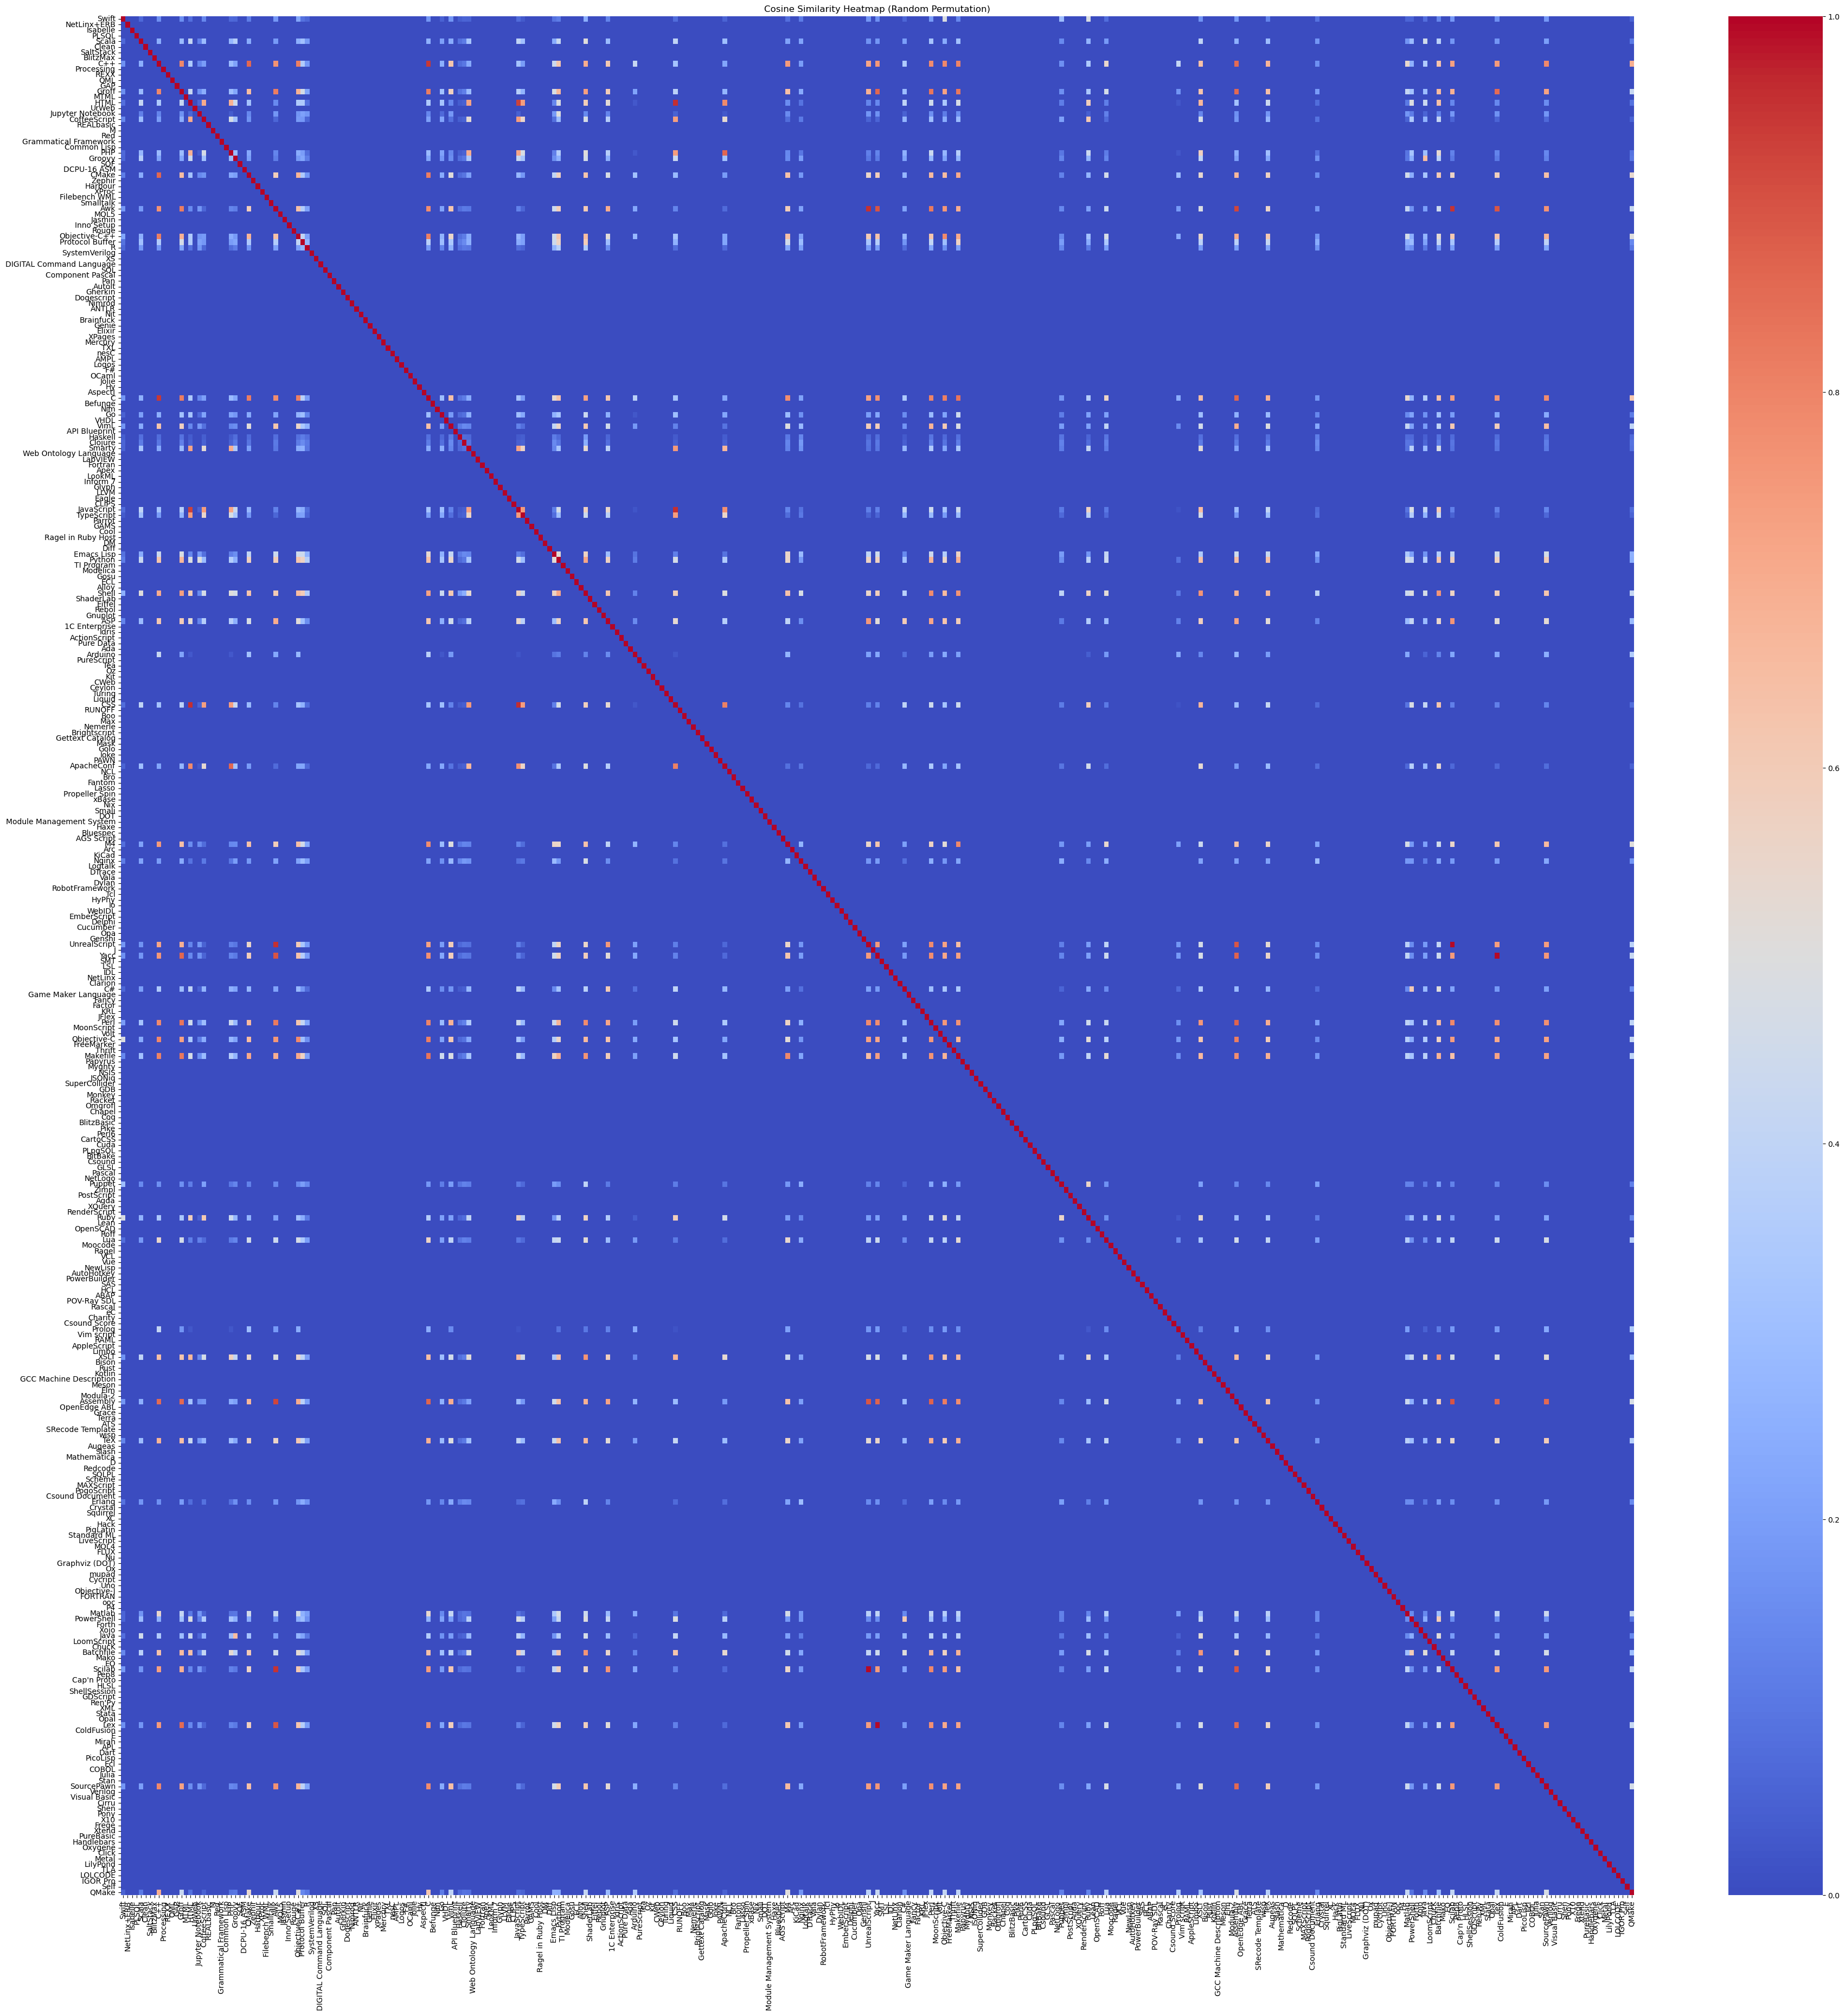

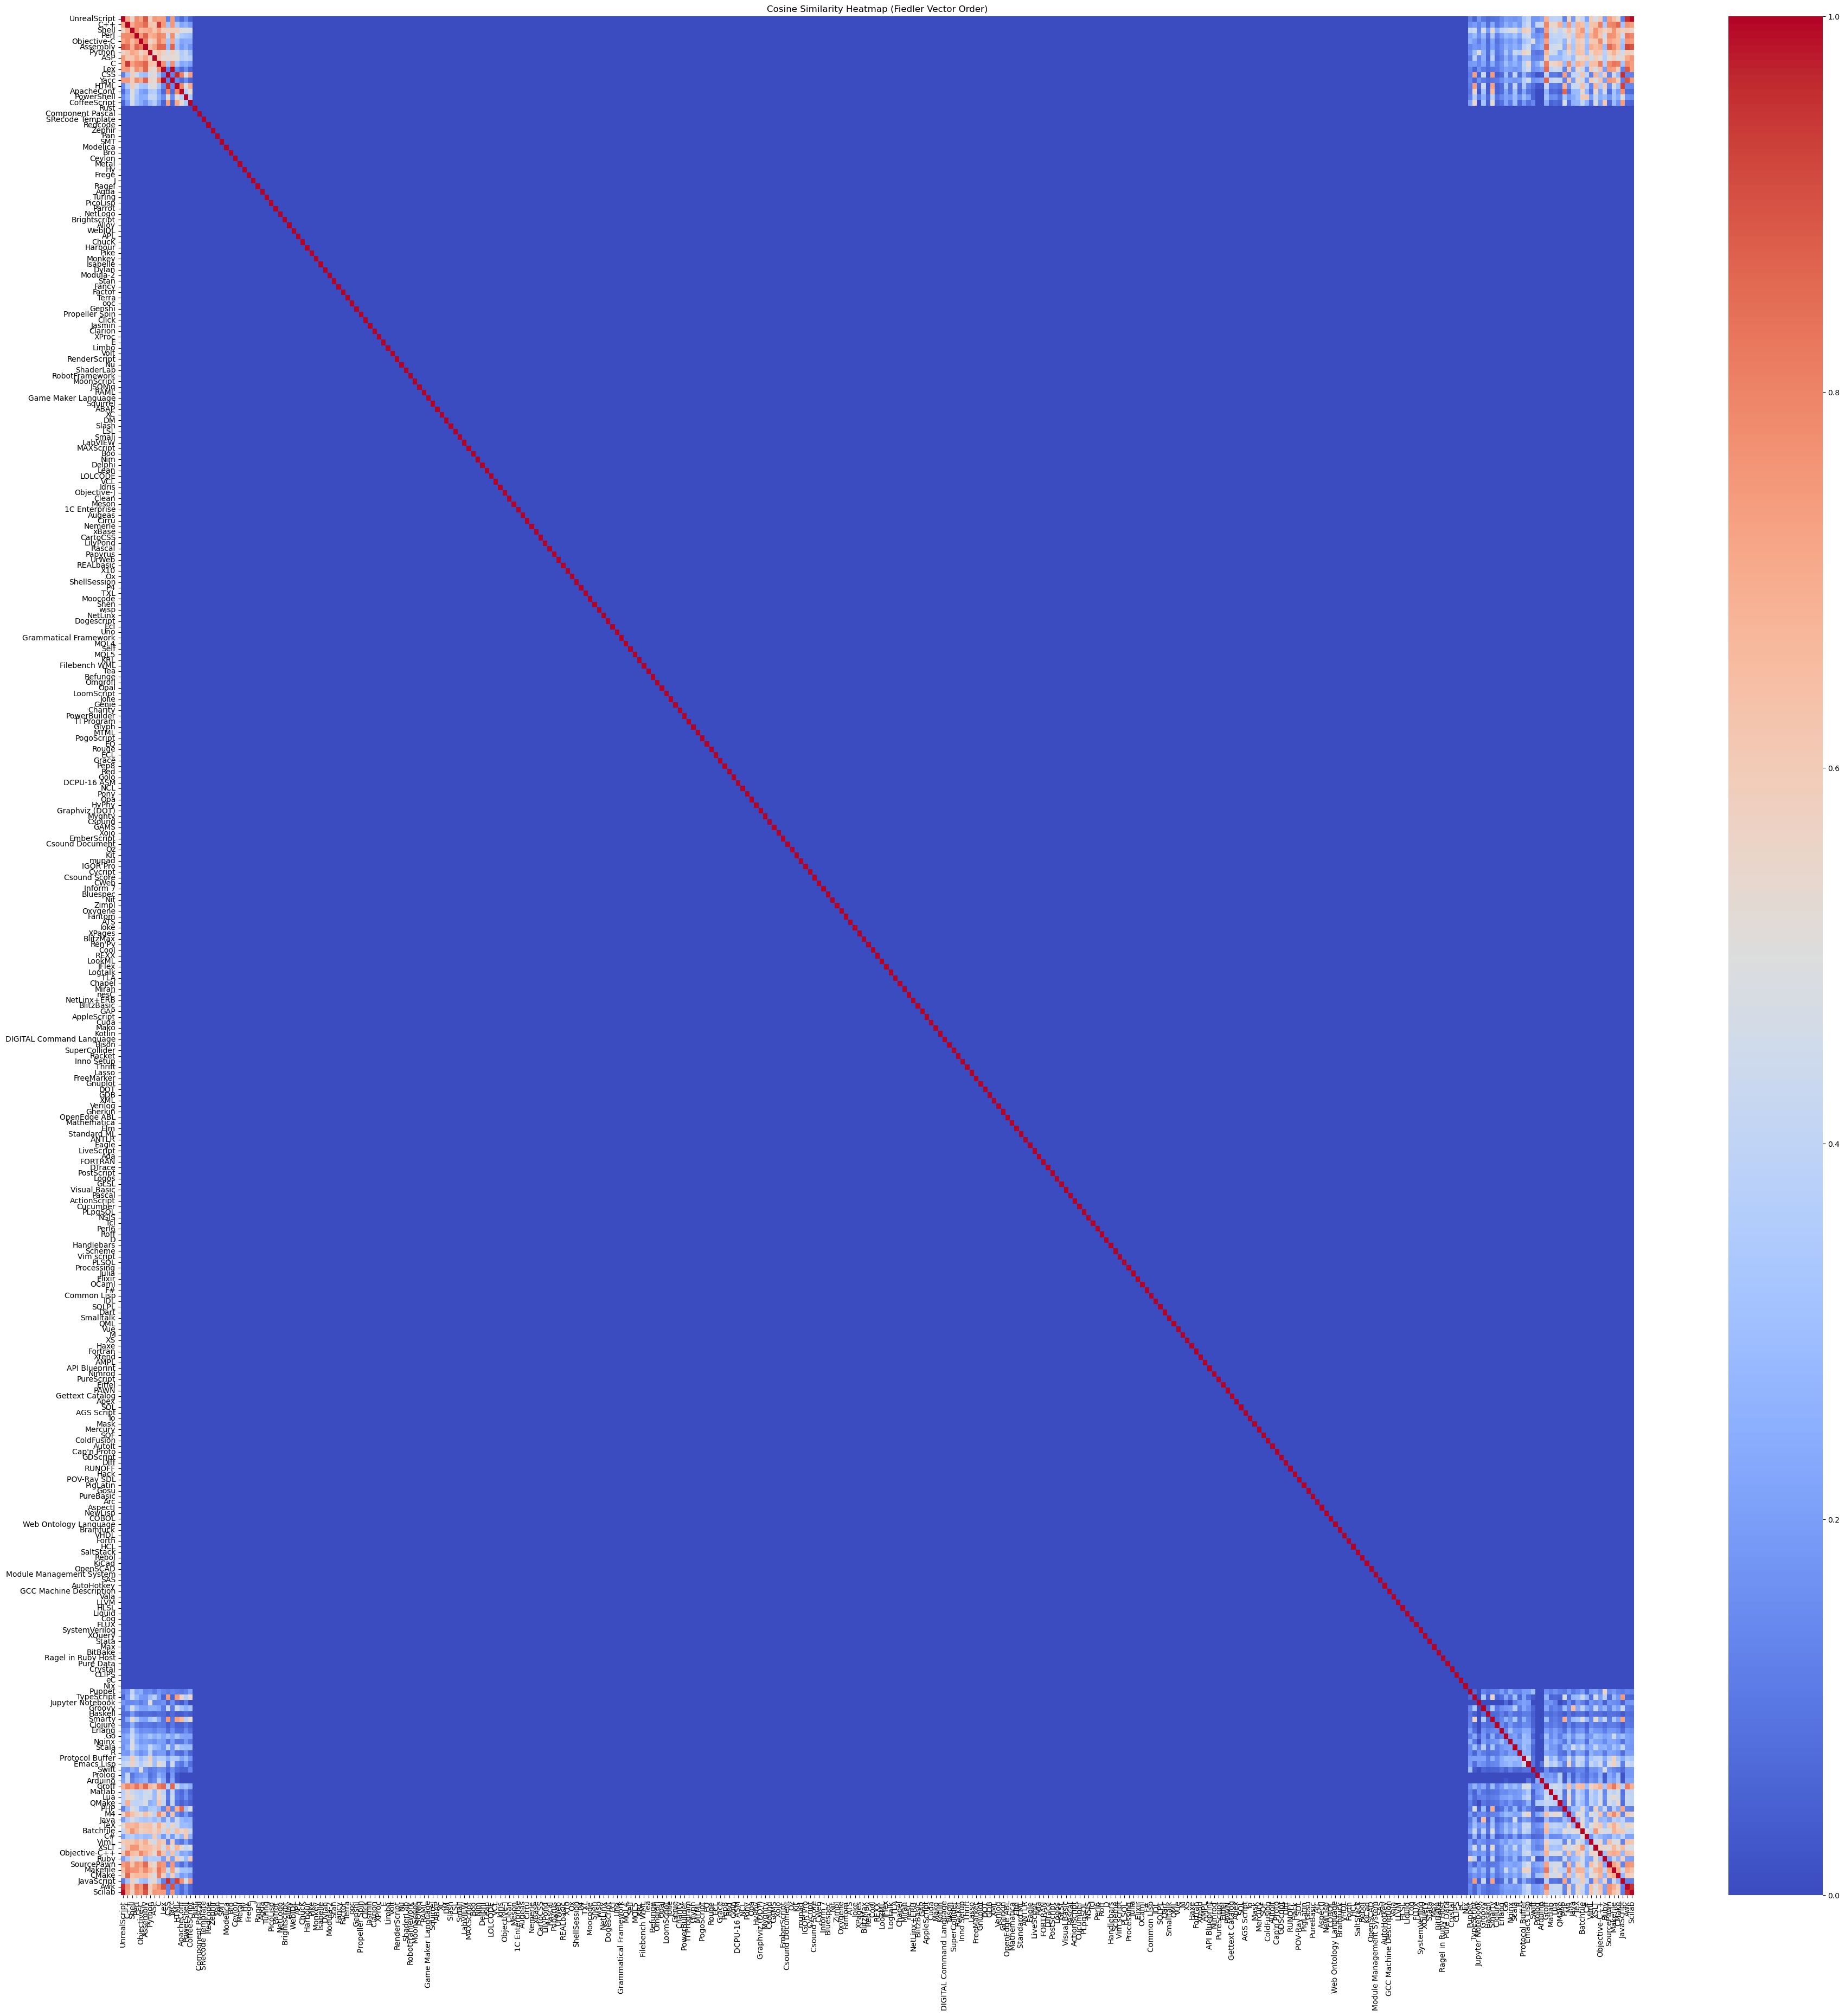

In [10]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.linalg import eigh

# Calculate the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(df.values)

# Order the rows and columns according to random permutation
random_permutation = np.random.permutation(similarity_matrix.shape[0])
similarity_matrix_random = similarity_matrix[random_permutation][:, random_permutation]

# Plot the heatmap with random permutation
plt.figure(figsize=(45, 45))
sns.heatmap(similarity_matrix_random, cmap='coolwarm', xticklabels=df.columns[random_permutation], yticklabels=df.columns[random_permutation])
plt.title('Cosine Similarity Heatmap (Random Permutation)')
plt.show()

# Calculate the Fiedler vector
eigenvalues, eigenvectors = eigh(similarity_matrix)
fiedler_vector = eigenvectors[:, 1]

# Order the rows and columns according to the monotonic order of the Fiedler vector elements
fiedler_order = np.argsort(fiedler_vector)
similarity_matrix_fiedler = similarity_matrix[fiedler_order][:, fiedler_order]

# Plot the heatmap with Fiedler vector order
plt.figure(figsize=(45, 45))
sns.heatmap(similarity_matrix_fiedler, cmap='coolwarm', xticklabels=df.columns[fiedler_order], yticklabels=df.columns[fiedler_order])
plt.title('Cosine Similarity Heatmap (Fiedler Vector Order)')
plt.show()


### Q2. Spectral co-clustering (5 points)

In this exercise you need to evaluate the robustness of the spectral co-clustering algorithm to random perturbation of a matrix with a bi-cluster structure. In particular, you need to:


* Generate matrices each with 300 rows and 300 columns and four bi-clusters, using the ```make_biclusters()``` function, for 20 evenly spaced values of the standard deviation of noise in the interval [0,100] 
* Randomly permute rows and columns of these matrices 
* Apply the spectral co-clustering algorithm to each of these randomly permuted matrices and compute the corresponding consensus score 
* Plot the consensus score versus the standard deviation of noise (similar to the one on slide 48 of the lecture)

Hint: For the `xlabel`, consider using the latex symbol $\sigma$

consensus score: 0.890


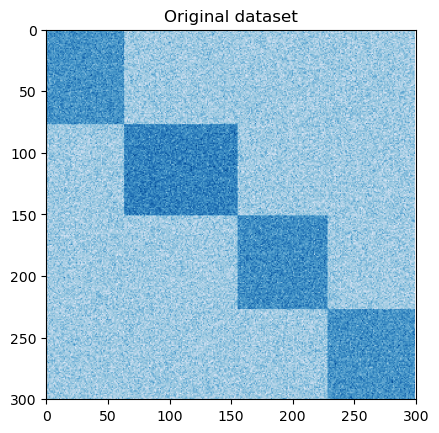

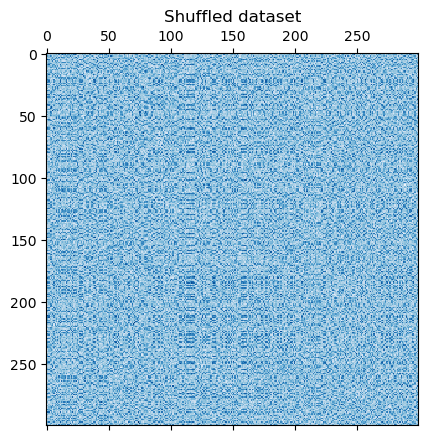

In [31]:
data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=4, noise=20, shuffle=False, random_state=0
)

plt.imshow(data, cmap=plt.cm.Blues)
plt.xlim(0,300);plt.ylim(300,0)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
shuffled_data = data[row_idx][:, col_idx]

plt.matshow(shuffled_data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=4, random_state=0)
model.fit(shuffled_data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

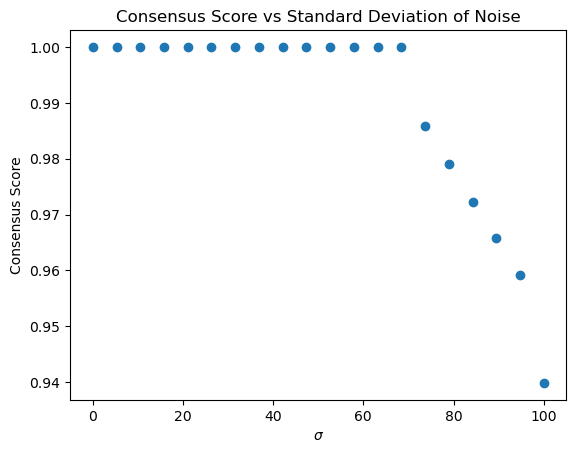

In [36]:
import numpy as np
from sklearn.datasets import make_biclusters
from sklearn.cluster._bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score
import matplotlib.pyplot as plt

# Define the range of standard deviation of noise
std_range = np.linspace(0, 100, 20)

# Initialize empty lists to store the standard deviation of noise and consensus scores
std_noise_list = []
consensus_score_list = []

# Iterate over the range of standard deviation of noise
for std_noise in std_range:
    # Generate the matrix with the specified standard deviation of noise
    data, rows, columns = make_biclusters(shape=(300, 300), n_clusters=4, noise=std_noise, shuffle=False, random_state=10)
    
    # Shuffle the rows and columns
    rng = np.random.RandomState(0)
    row_idx = rng.permutation(data.shape[0])
    col_idx = rng.permutation(data.shape[1])
    shuffled_data = data[row_idx][:, col_idx]
    
    # Apply the spectral co-clustering algorithm
    model = SpectralCoclustering(n_clusters=4, random_state=0)
    model.fit(shuffled_data)
    
    # Compute the consensus score
    score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))
    
    # Append the standard deviation of noise and consensus score to the lists
    std_noise_list.append(std_noise)
    consensus_score_list.append(score)

# Plot the consensus score versus the standard deviation of noise
plt.scatter(std_noise_list, consensus_score_list)
plt.xlabel(r'$\sigma$')
plt.ylabel('Consensus Score')
plt.title('Consensus Score vs Standard Deviation of Noise')
plt.show()


